In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [ ]:
import pandas as pd


df = pd.read_csv("/content/insurance_claims.csv")
df


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [ ]:
df = df.drop('policy_number', axis=1)        #drop the column 'policy_number' usning '.drop' function.
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries             

In [ ]:
df = df.drop('_c39', axis=1)    #or you can drop both the columns using this code.   "data = data.drop(['policy_number', '_c39'], axis=1)"
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [ ]:
df['incident_date']


0      2015-01-25
1      2015-01-21
2      2015-02-22
3      2015-01-10
4      2015-02-17
          ...    
995    2015-02-22
996    2015-01-24
997    2015-01-23
998    2015-02-26
999    2015-02-26
Name: incident_date, Length: 1000, dtype: object

In [ ]:
df['incident_date'] = pd.to_datetime(df.incident_date)                               #convert dtype of dates columns in the datetime.
df['policy_bind_date'] = pd.to_datetime(df.policy_bind_date)

In [ ]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

In [ ]:
import numpy as np                     #Convert days in months

df['months_bw_incident_and_bind'] = (df['incident_date'] - df['policy_bind_date'] ) / np.timedelta64(1,'M')
df['months_bw_incident_and_bind'] = df['months_bw_incident_and_bind'].astype(int)

df['months_bw_incident_and_bind']

0        3
1      100
2      170
3      290
4        8
      ... 
995    278
996     12
997    140
998     38
999    215
Name: months_bw_incident_and_bind, Length: 1000, dtype: int64

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,100
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,170
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,278
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,140
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,38


In [ ]:
df['incident_within_customership'] = df[['months_bw_incident_and_bind', 'months_as_customer']] \
                                      .apply(lambda x:1 if x.months_as_customer >= x.months_bw_incident_and_bind and \
                                             x.months_bw_incident_and_bind > 0 else 0, axis = 1)

df['incident_within_customership']


0      1
1      1
2      0
3      0
4      1
      ..
995    0
996    1
997    0
998    1
999    1
Name: incident_within_customership, Length: 1000, dtype: int64

In [ ]:
df['capital-loss'] = df['capital-loss'].abs()
df['capital-loss']


0          0
1          0
2          0
3      62400
4      46000
       ...  
995        0
996        0
997        0
998        0
999        0
Name: capital-loss, Length: 1000, dtype: int64

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,100,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,170,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,278,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,140,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,38,1


In [ ]:
df[df['injury_claim'] + df['property_claim'] + df['vehicle_claim'] != df['total_claim_amount']]

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership


In [ ]:
dict(df.dtypes)['months_as_customer']


dtype('int64')

In [ ]:
for i in dict(df.dtypes):                 #find wathere the value in the columns is negavtive
  if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64'):
    print(i, ":",df[df[i]<0].shape[0])

months_as_customer : 0
age : 0
policy_deductable : 0
policy_annual_premium : 0
umbrella_limit : 1
insured_zip : 0
capital-gains : 0
capital-loss : 0
incident_hour_of_the_day : 0
number_of_vehicles_involved : 0
bodily_injuries : 0
witnesses : 0
total_claim_amount : 0
injury_claim : 0
property_claim : 0
vehicle_claim : 0
auto_year : 0
months_bw_incident_and_bind : 0
incident_within_customership : 0


In [ ]:
df.index[df[df['umbrella_limit']<0].index[0]]

290

In [ ]:
df.drop(df.index[df[df['umbrella_limit']<0].index[0]], inplace = True)
df


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,100,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,170,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,278,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,140,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,38,1


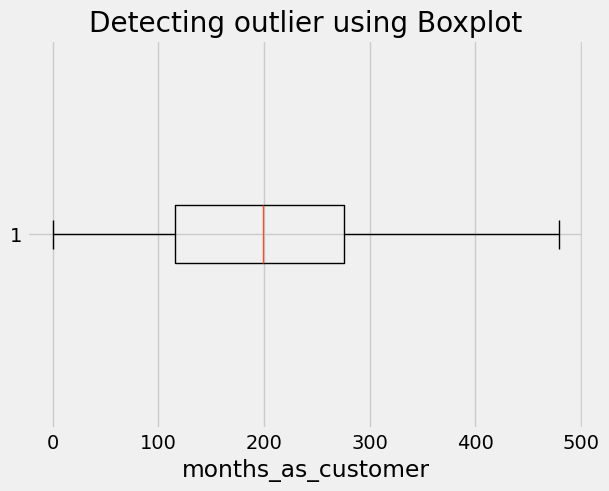

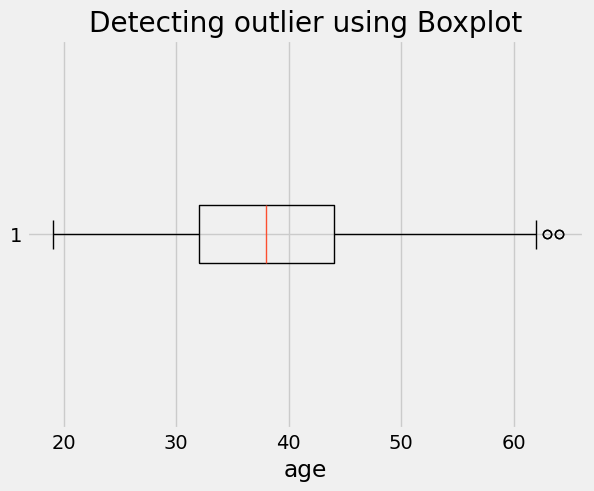

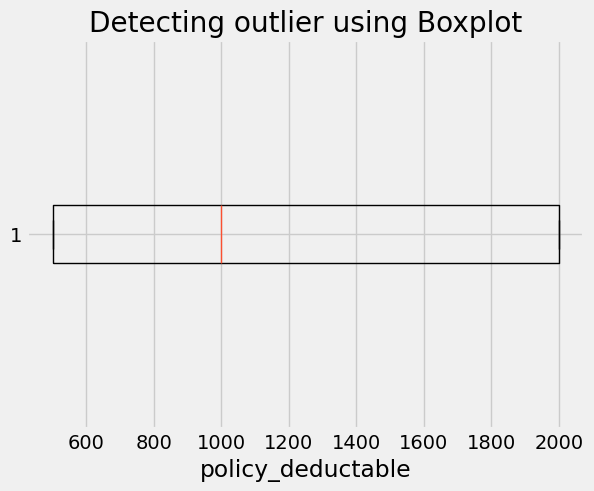

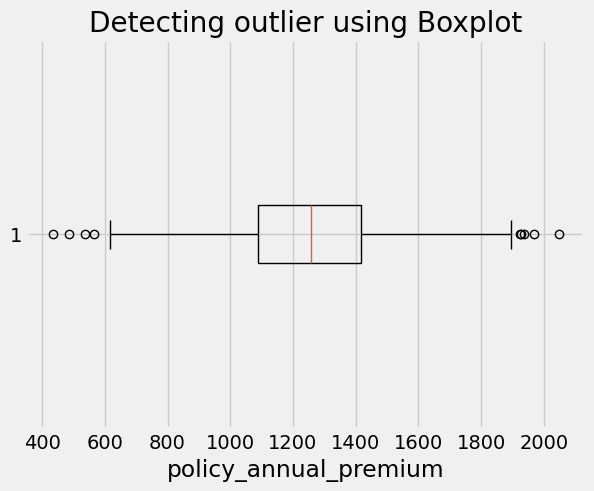

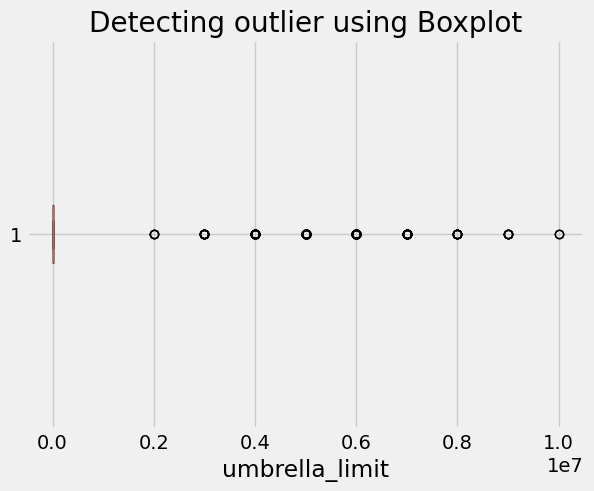

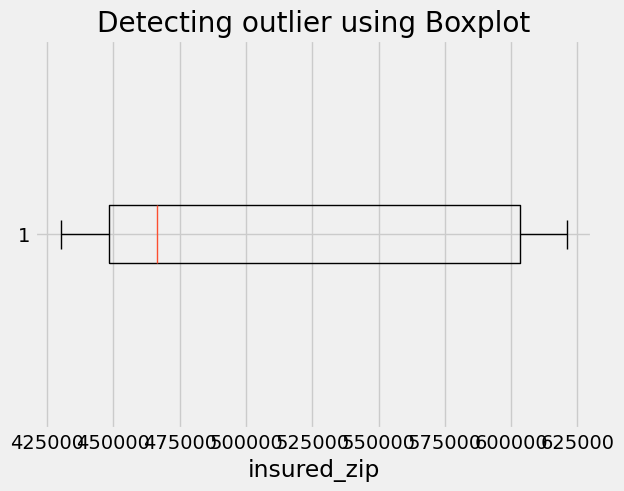

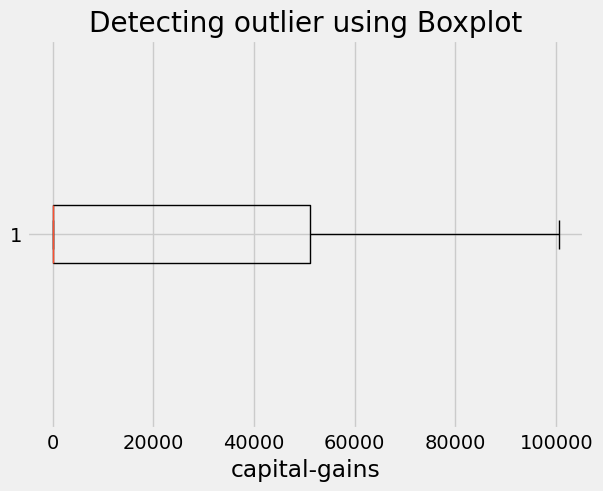

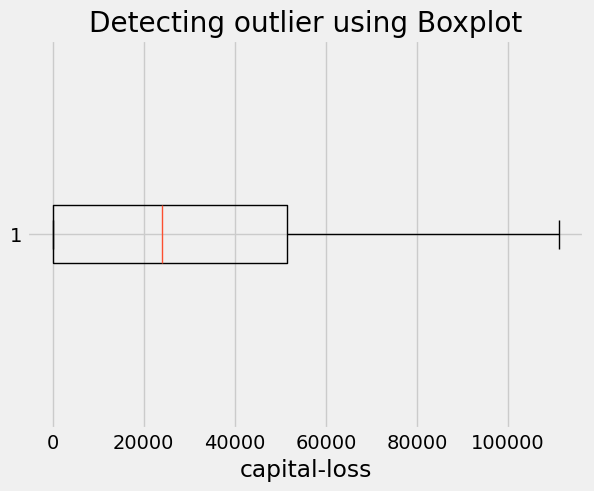

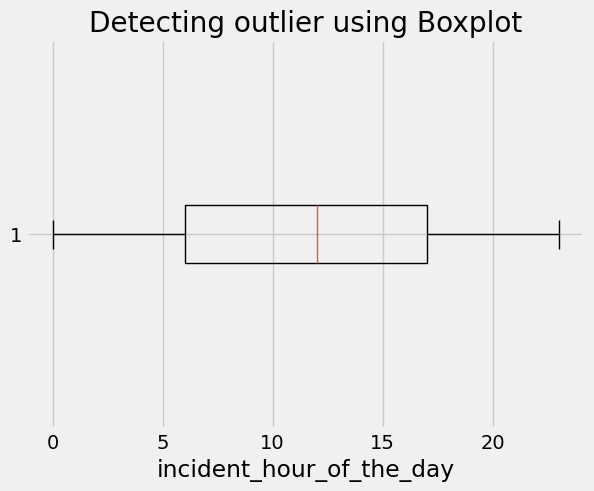

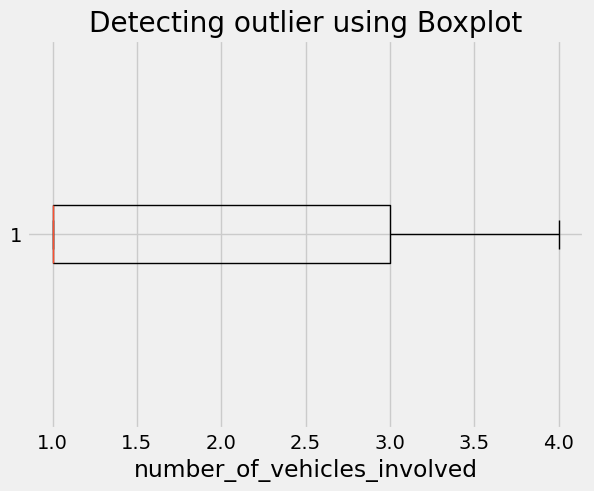

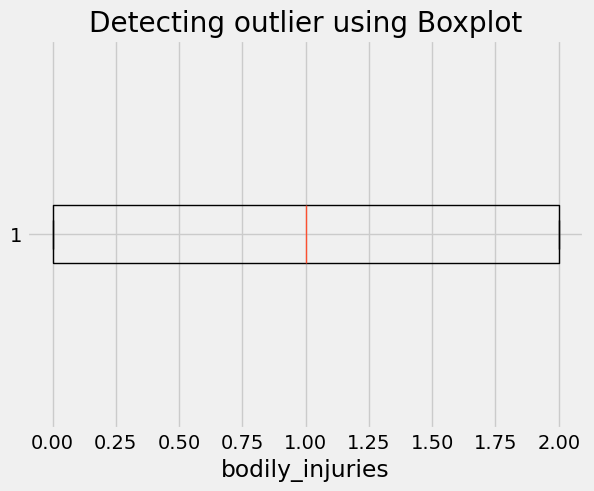

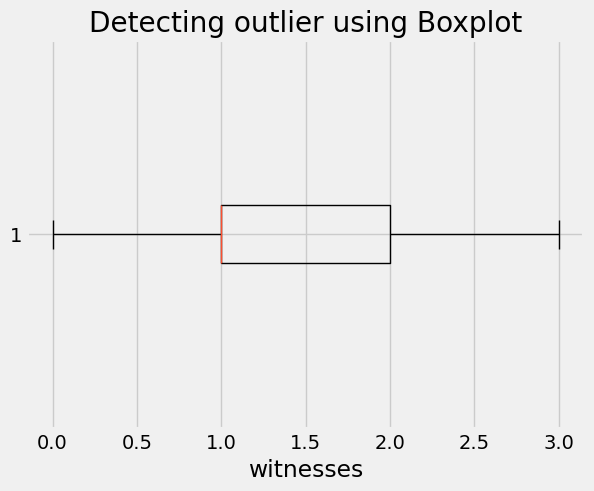

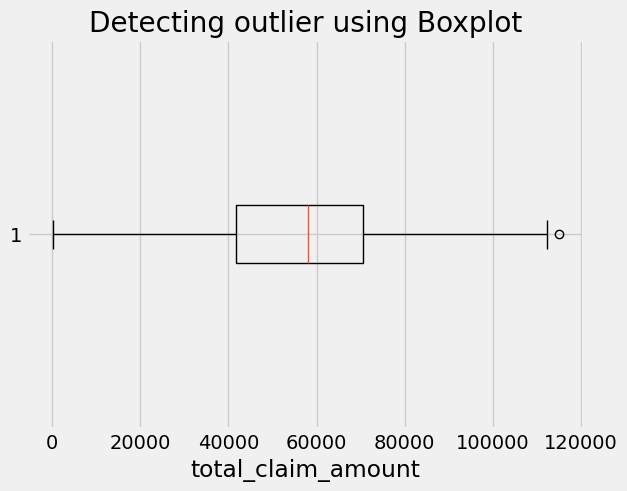

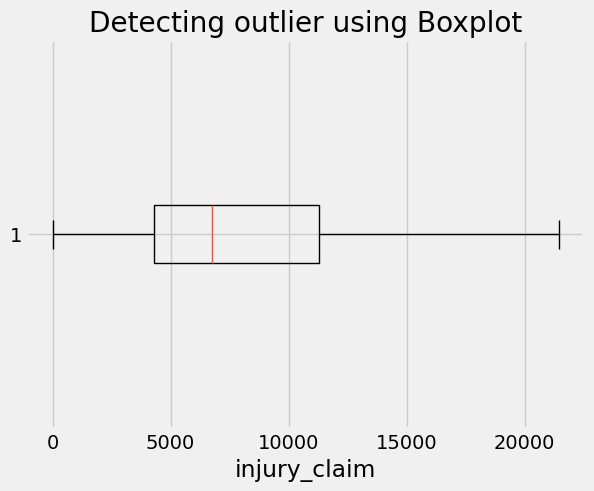

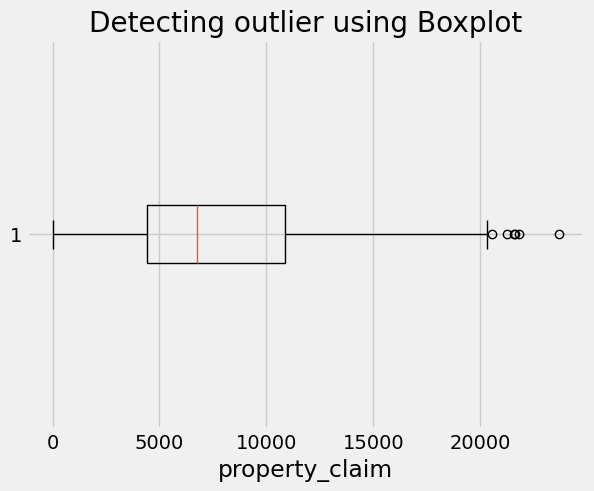

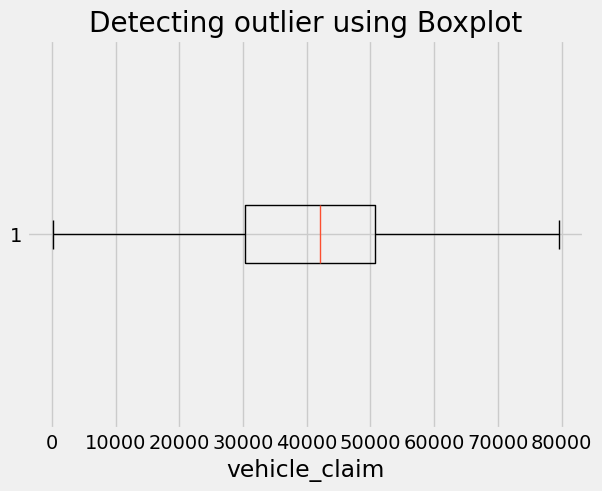

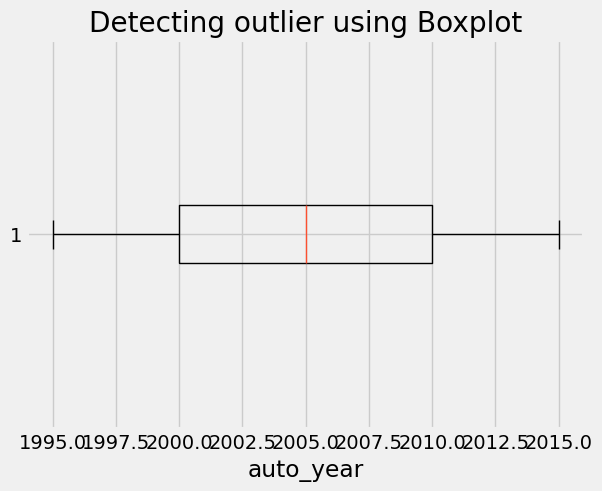

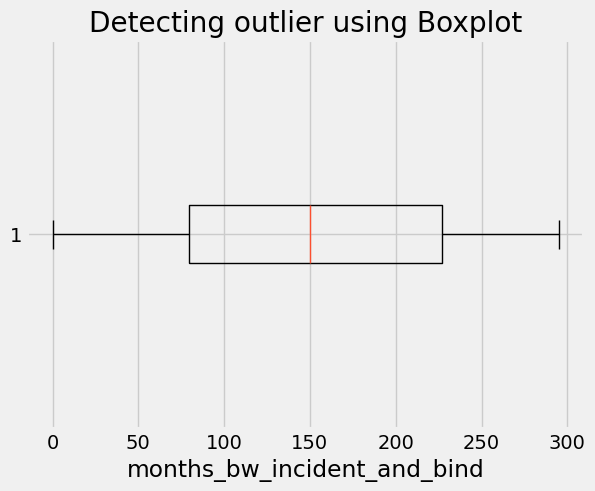

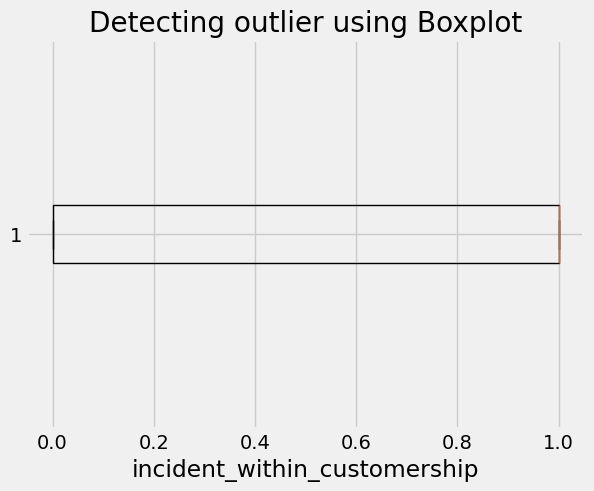

In [ ]:
import matplotlib.pyplot as plt

for i in dict(df.dtypes):
  if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] == 'float64':
    plt.boxplot(df[i], vert = False)
    plt.title("Detecting outlier using Boxplot")
    plt.xlabel(i)
    plt.show()

In [ ]:
import numpy as np

def detect_outliers_zscore(data):
  outliers = []
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/ std
    if (np.abs(z_score)> thres):
      outliers.append(i)
  return outlier

In [ ]:
import numpy as np

def detect_outliers_zscore(data):
  outliers = [] # The list to store outliers
  thres = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/ std
    if (np.abs(z_score)> thres):
      outliers.append(i)
  return outliers # Return the list of outliers, not a non-existent variable 'outlier'

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,100,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,170,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,278,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,140,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,38,1


In [ ]:
df = df.replace("?", np.NaN)
for i in df.columns:
  print("column: ", i)
  print("Number of nulls: ", df[i].isnull().sum())


column:  months_as_customer
Number of nulls:  0
column:  age
Number of nulls:  0
column:  policy_bind_date
Number of nulls:  0
column:  policy_state
Number of nulls:  0
column:  policy_csl
Number of nulls:  0
column:  policy_deductable
Number of nulls:  0
column:  policy_annual_premium
Number of nulls:  0
column:  umbrella_limit
Number of nulls:  0
column:  insured_zip
Number of nulls:  0
column:  insured_sex
Number of nulls:  0
column:  insured_education_level
Number of nulls:  0
column:  insured_occupation
Number of nulls:  0
column:  insured_hobbies
Number of nulls:  0
column:  insured_relationship
Number of nulls:  0
column:  capital-gains
Number of nulls:  0
column:  capital-loss
Number of nulls:  0
column:  incident_date
Number of nulls:  0
column:  incident_type
Number of nulls:  0
column:  collision_type
Number of nulls:  178
column:  incident_severity
Number of nulls:  0
column:  authorities_contacted
Number of nulls:  91
column:  incident_state
Number of nulls:  0
column:  in

In [ ]:
df.nunique()


months_as_customer              391
age                              46
policy_bind_date                950
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           990
umbrella_limit                   10
insured_zip                     994
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location               999
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [ ]:
df = df.drop("incident_location", axis=1)

df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [ ]:

df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,71610,6510,13020,52080,Saab,92x,2004,Y,3,1
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,5070,780,780,3510,Mercedes,E400,2007,Y,100,1
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,34650,7700,3850,23100,Dodge,RAM,2007,N,170,0
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290,0
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,6500,1300,650,4550,Accura,RSX,2009,N,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,87200,17440,8720,61040,Honda,Accord,2006,N,278,0
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12,1
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,67500,7500,7500,52500,Suburu,Impreza,1996,N,140,0
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,46980,5220,5220,36540,Audi,A5,1998,N,38,1


In [ ]:
#Encoding
mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0,466132,0,...,71610,6510,13020,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000,468176,0,...,5070,780,780,3510,1,1,2007,0,100,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000,430632,1,...,34650,7700,3850,23100,2,2,2007,1,170,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000,608117,1,...,63400,6340,6340,50720,3,3,2014,0,290,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000,610706,0,...,6500,1300,650,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0,431289,1,...,87200,17440,8720,61040,12,31,2006,1,278,0
996,285,41,2014-01-05,2,1,1000,1436.79,0,608177,1,...,108480,18080,18080,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000,442797,1,...,67500,7500,7500,52500,9,17,1996,1,140,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000,441714,0,...,46980,5220,5220,36540,6,7,1998,1,38,1


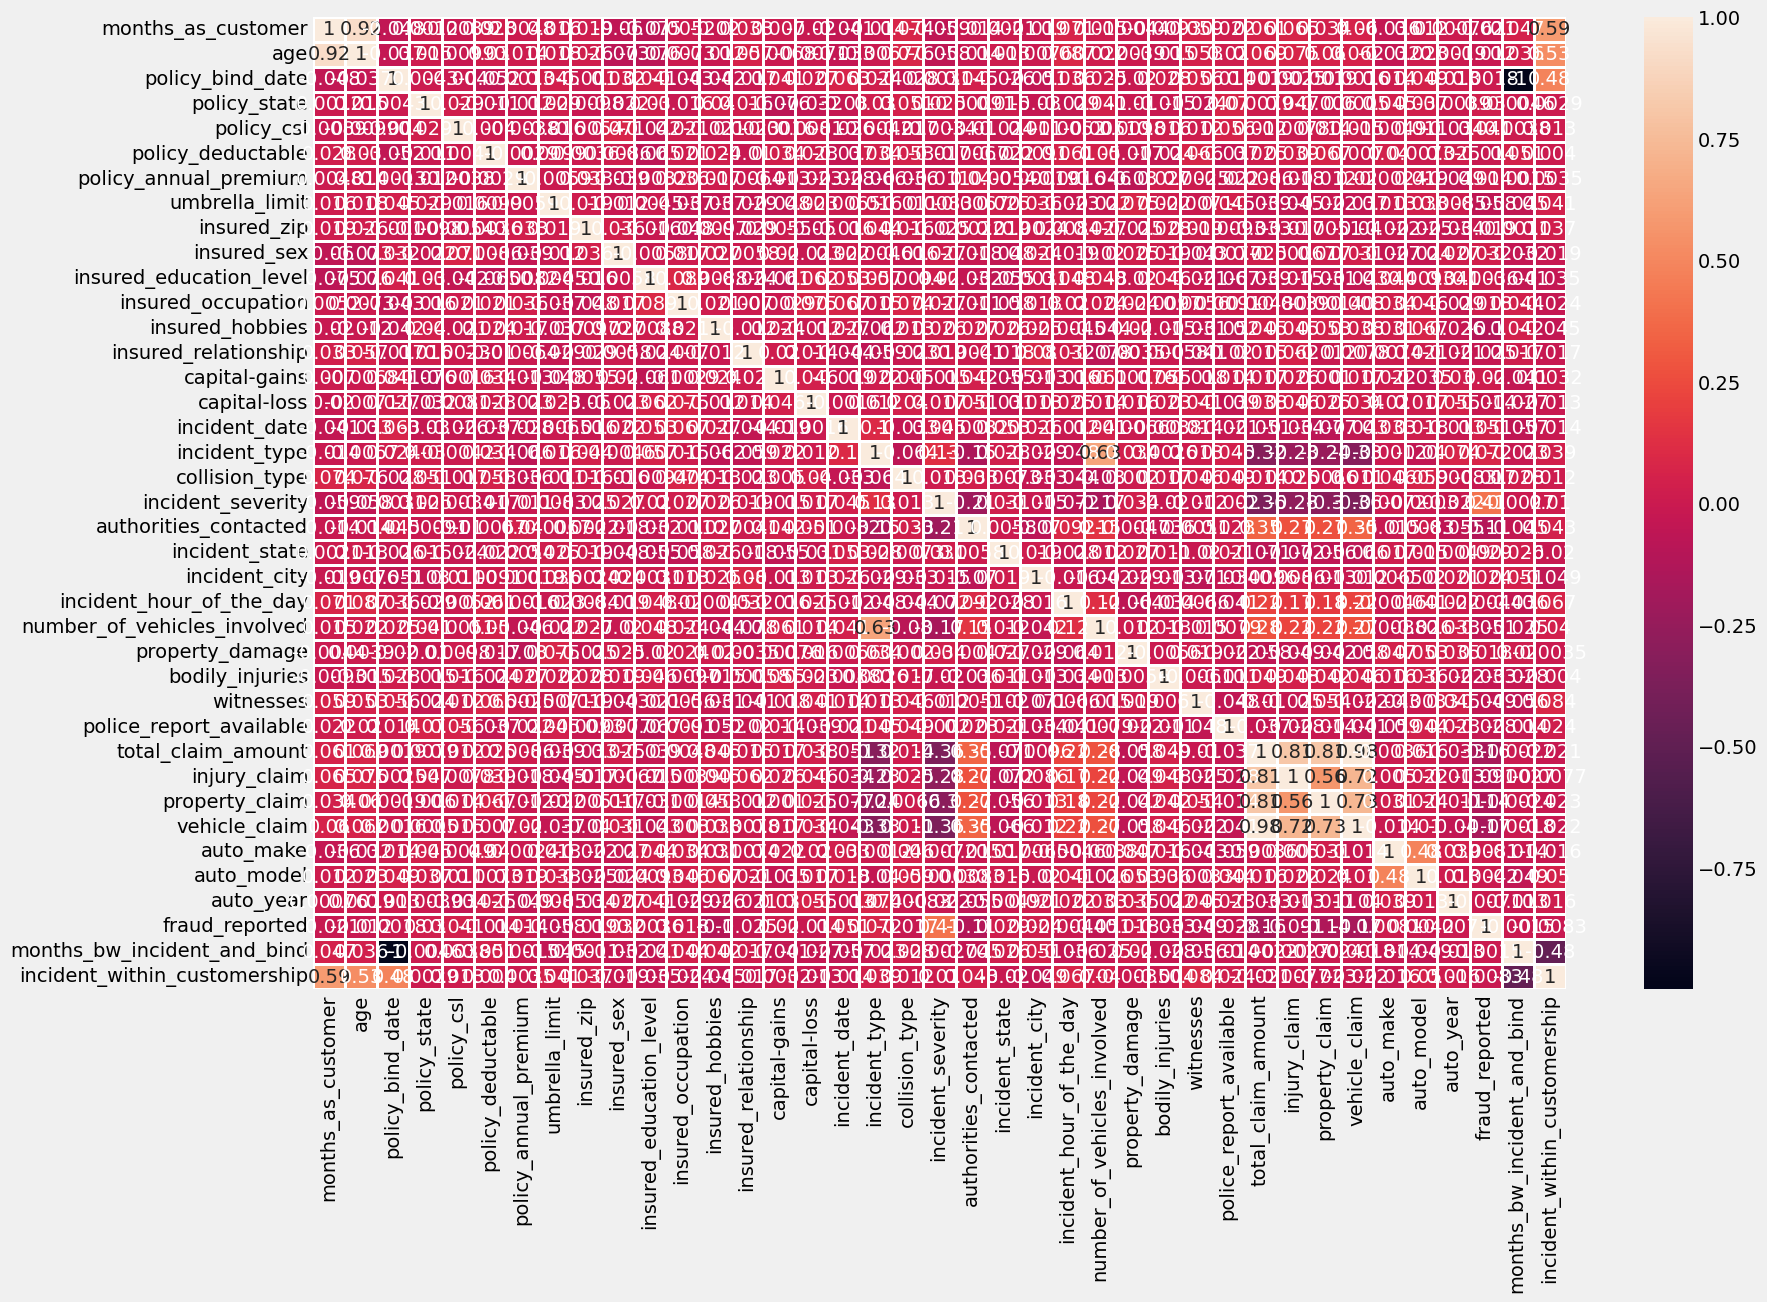

In [ ]:
#Feature selection
import seaborn as sns
plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0,466132,0,...,71610,6510,13020,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000,468176,0,...,5070,780,780,3510,1,1,2007,0,100,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000,430632,1,...,34650,7700,3850,23100,2,2,2007,1,170,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000,608117,1,...,63400,6340,6340,50720,3,3,2014,0,290,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000,610706,0,...,6500,1300,650,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0,431289,1,...,87200,17440,8720,61040,12,31,2006,1,278,0
996,285,41,2014-01-05,2,1,1000,1436.79,0,608177,1,...,108480,18080,18080,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000,442797,1,...,67500,7500,7500,52500,9,17,1996,1,140,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000,441714,0,...,46980,5220,5220,36540,6,7,1998,1,38,1


In [ ]:
df = df.drop('vehicle_claim', axis = 1) #as its correlation with another feature (total_claim_amount) > 95%. Keeping multiple strongly correlated featured would make the collection of such features influential.
df = df.drop(['policy_bind_date', 'incident_date'], axis = 1) #as information from these features has been exported to new derived features
from sklearn.ensemble import ExtraTreesClassifier
y = df["fraud_reported"]
x = df.drop("fraud_reported", axis = 1)
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.02920422 0.02818448 0.02278969 0.02221471 0.02332096 0.02700853
 0.01907885 0.02873389 0.01845558 0.02488251 0.02812293 0.04131012
 0.02410153 0.02275305 0.02600355 0.01699277 0.02185829 0.15062225
 0.02741337 0.02818387 0.02557201 0.02823742 0.01581882 0.01681227
 0.02334369 0.02462078 0.01678774 0.0321875  0.02982406 0.03138174
 0.02683158 0.02576082 0.02883948 0.02561516 0.01713177]


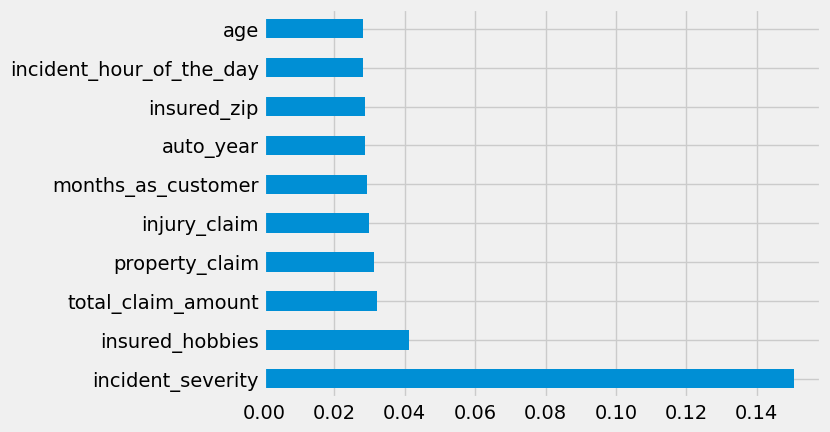

In [ ]:
#Finding 10 most important features
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

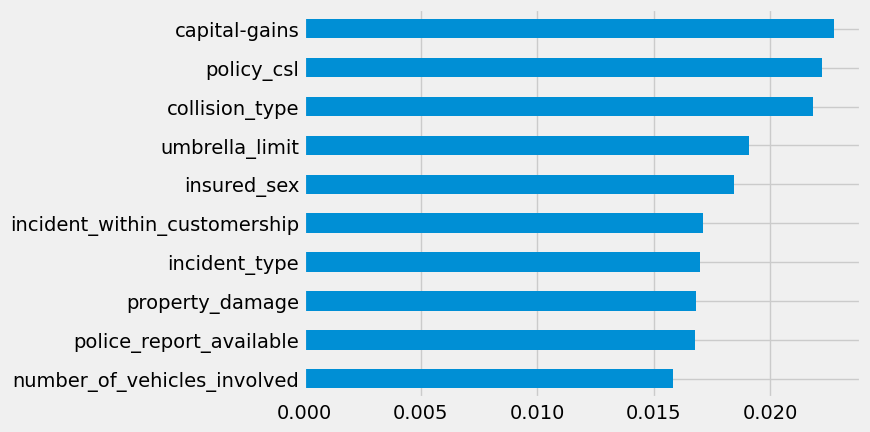

In [ ]:
#Finding 10 least important features
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

In [ ]:
#Not selecting columns with importance < 0.02
df = df.drop(['collision_type','property_damage', 'incident_within_customership', 'insured_sex', 'umbrella_limit', 'number_of_vehicles_involved', 'police_report_available', 'incident_type'], axis = 1)


In [ ]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,0,0,1000,1406.91,466132,0,0,0,...,1,2,71610,6510,13020,0,0,2004,0,3
1,228,42,1,0,2000,1197.22,468176,0,1,1,...,0,0,5070,780,780,1,1,2007,0,100
2,134,29,0,1,2000,1413.14,430632,1,2,2,...,2,3,34650,7700,3850,2,2,2007,1,170
3,256,41,2,0,2000,1415.74,608117,1,3,2,...,1,2,63400,6340,6340,3,3,2014,0,290
4,228,44,2,2,1000,1583.91,610706,2,2,2,...,0,1,6500,1300,650,4,4,2009,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0,2,1000,1310.80,431289,3,0,12,...,0,1,87200,17440,8720,12,31,2006,1,278
996,285,41,2,1,1000,1436.79,608177,1,5,0,...,2,3,108480,18080,18080,13,27,2015,1,12
997,130,34,0,0,500,1383.49,442797,3,3,3,...,2,3,67500,7500,7500,9,17,1996,1,140
998,458,62,2,2,2000,1356.92,441714,2,11,4,...,0,1,46980,5220,5220,6,7,1998,1,38


In [ ]:
# Data Analysis and Visualization
print(mappings['fraud_reported'])
print("YES: ",y[y == 0].shape[0])
print("NO:",y[y ==1].shape[0])


{'Y': 0, 'N': 1}
YES:  247
NO: 752


fraud_reported: {'Y': 0, 'N': 1}
incident_severity: {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3}
fraud_reported       0    1
incident_severity          
0                  167  108
1                   38  316
2                   36  244
3                    6   84

fraud_reported: {'Y': 0, 'N': 1}
insured_hobbies: {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}
fraud_reported    0   1
insured_hobbies        
0                 8  33
1                17  47
2                14  34
3                 9  47
4                13  36
5                 6  49
6                 5  50
7                 5  38
8                11  38
9                 9  46
10               12  40
11               16  37
12

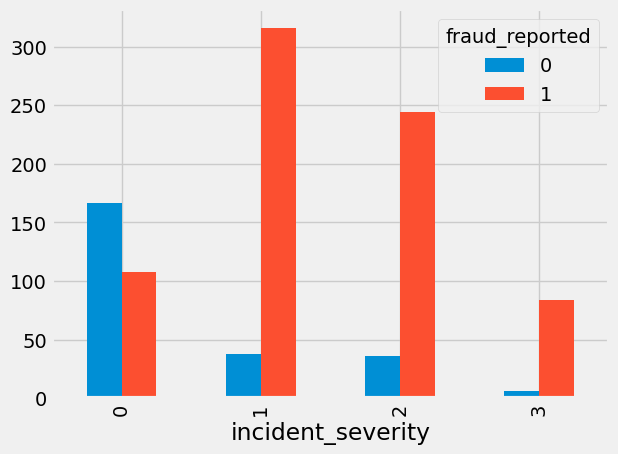

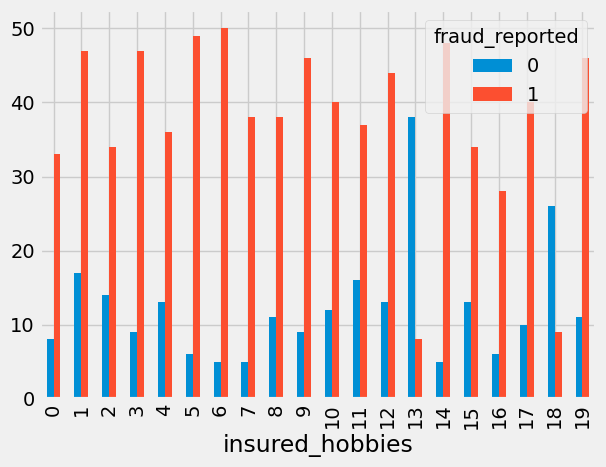

In [ ]:
for i in dict(feature_importances.nlargest(10)):
  if i in mappings:
    chart = pd.crosstab(index = df[i], columns = df['fraud_reported'])
    print('fraud_reported' + ':', mappings['fraud_reported'])
    print(i + ':',mappings[i])
    print(chart)
    print()
    chart.plot.bar()

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'insured_zip',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported',
       'months_bw_incident_and_bind'],
      dtype='object')

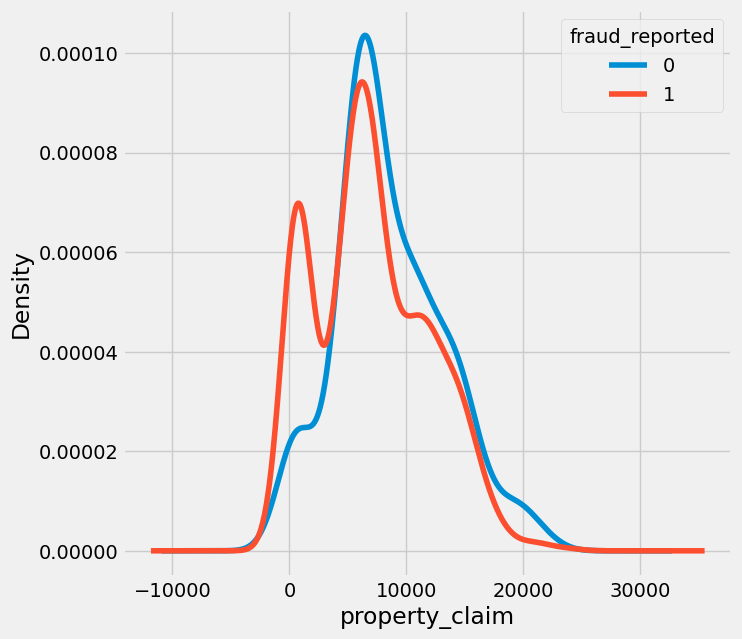

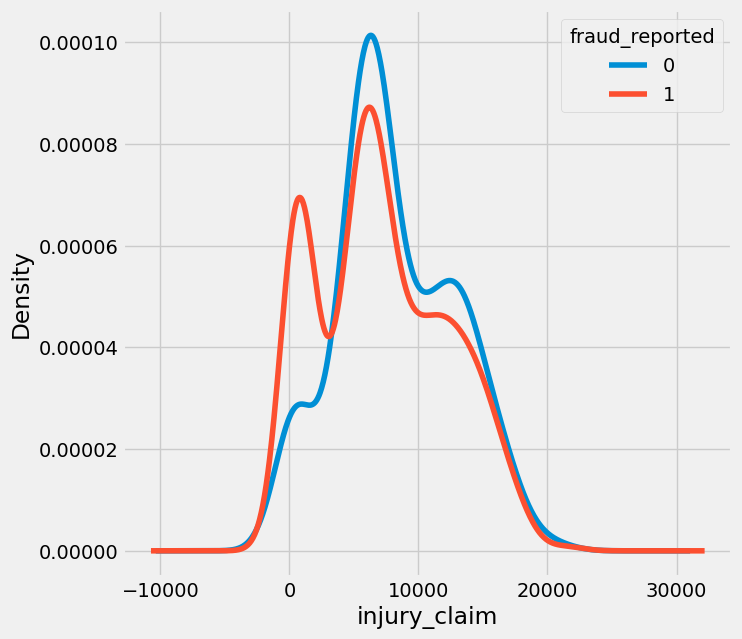

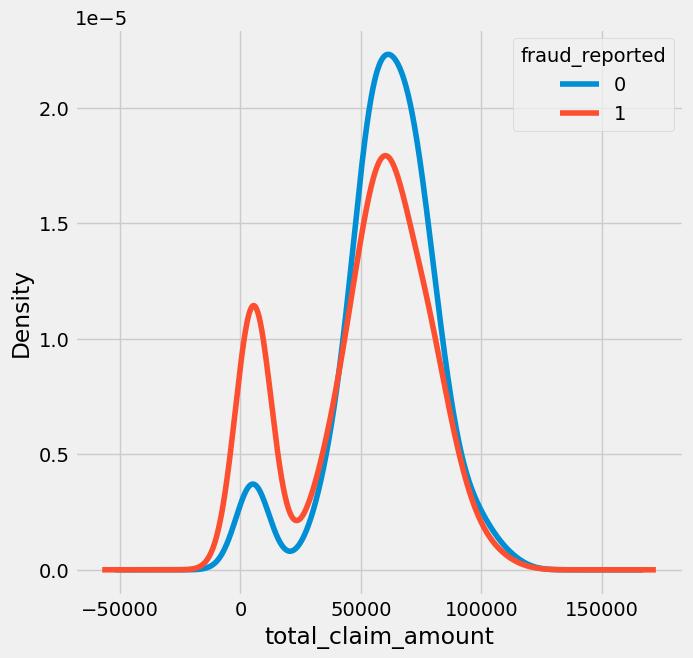

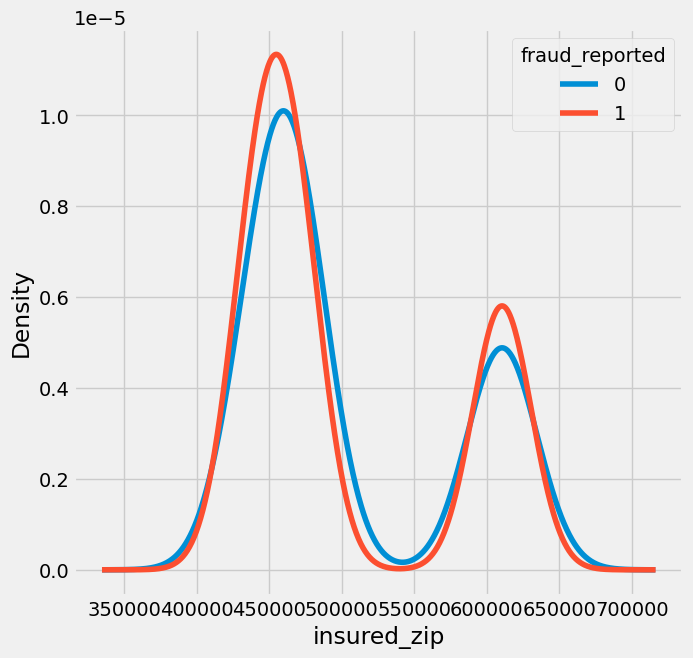

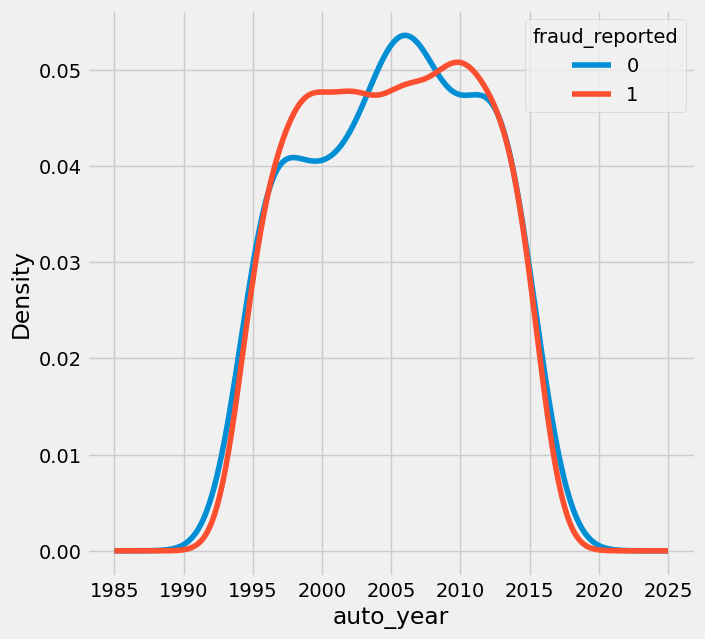

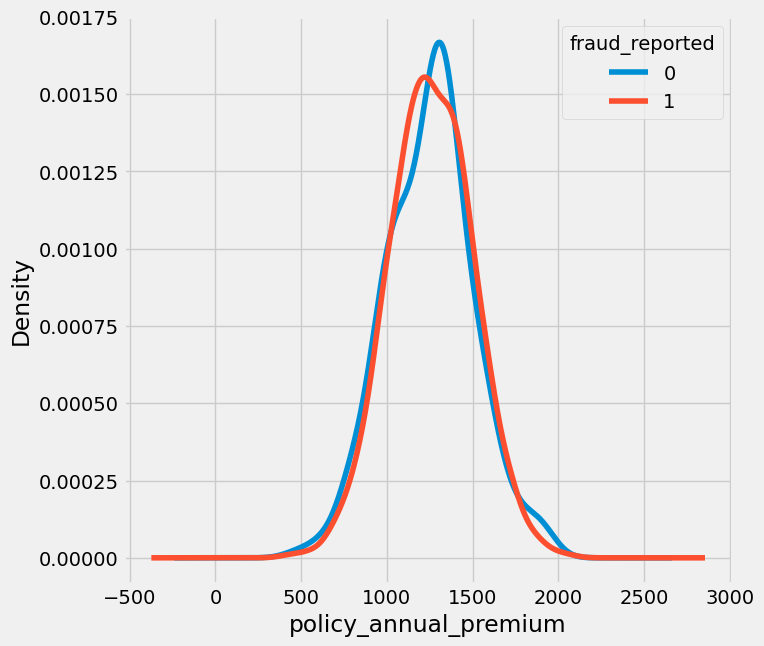

In [ ]:
# For continuous columns
for i in dict(feature_importances.nlargest(10)):
  if i not in mappings:
    df_specific_column = df.pivot(columns ='fraud_reported', values = i)
    df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
    plt.xlabel(i)

In [ ]:
# Explanatory Model Building
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
len(X_Train)

799

In [ ]:
len(Y_Train)

799

In [ ]:
len(X_Test)


200

In [ ]:
len(Y_Test)

200

In [ ]:
# Explore training all ML models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
model = LogisticRegression()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))


Accuracy: 0.75

 classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.76      0.99      0.86       152

    accuracy                           0.75       200
   macro avg       0.38      0.49      0.43       200
weighted avg       0.58      0.75      0.65       200


 confusion matrix:
 [[  0  48]
 [  2 150]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))

Accuracy: 0.71

 classification report:
               precision    recall  f1-score   support

           0       0.29      0.15      0.19        48
           1       0.77      0.89      0.82       152

    accuracy                           0.71       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.65      0.71      0.67       200


 confusion matrix:
 [[  7  41]
 [ 17 135]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))

Accuracy: 0.71

 classification report:
               precision    recall  f1-score   support

           0       0.29      0.15      0.19        48
           1       0.77      0.89      0.82       152

    accuracy                           0.71       200
   macro avg       0.53      0.52      0.51       200
weighted avg       0.65      0.71      0.67       200


 confusion matrix:
 [[  7  41]
 [ 17 135]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))


Accuracy: 0.77

 classification report:
               precision    recall  f1-score   support

           0       0.52      0.62      0.57        48
           1       0.87      0.82      0.84       152

    accuracy                           0.77       200
   macro avg       0.70      0.72      0.70       200
weighted avg       0.79      0.77      0.78       200


 confusion matrix:
 [[ 30  18]
 [ 28 124]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))


Accuracy: 0.735

 classification report:
               precision    recall  f1-score   support

           0       0.41      0.25      0.31        48
           1       0.79      0.89      0.84       152

    accuracy                           0.73       200
   macro avg       0.60      0.57      0.57       200
weighted avg       0.70      0.73      0.71       200


 confusion matrix:
 [[ 12  36]
 [ 17 135]]


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)

print('Accuracy:', accuracy_score(Y_Test, pred))
print('\n classification report:\n', classification_report(Y_Test, pred))
print('\n confusion matrix:\n', confusion_matrix(Y_Test, pred))




Accuracy: 0.815

 classification report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63        48
           1       0.89      0.86      0.88       152

    accuracy                           0.81       200
   macro avg       0.75      0.76      0.75       200
weighted avg       0.82      0.81      0.82       200


 confusion matrix:
 [[ 32  16]
 [ 21 131]]


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(colsample_bytree= 1, learning_rate = 0.05, max_depth = 10, n_estimators = 100, subsample = 1)
model = model.fit(X_Train, Y_Train)
pred = model.predict(X_Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))


Accuracy: 0.81

 clasification report:
               precision    recall  f1-score   support

           0       0.59      0.71      0.64        48
           1       0.90      0.84      0.87       152

    accuracy                           0.81       200
   macro avg       0.74      0.78      0.76       200
weighted avg       0.83      0.81      0.82       200


 confussion matrix:
 [[ 34  14]
 [ 24 128]]


[0.         0.00657895 0.16447368 0.16447368 0.44736842 0.44736842
 0.45394737 0.45394737 0.61184211 0.61184211 0.72368421 0.72368421
 0.74342105 0.74342105 0.80921053 0.80921053 0.82236842 0.82236842
 0.82894737 0.82894737 0.83552632 0.83552632 0.84210526 0.84210526
 0.84868421 0.84868421 0.85526316 0.85526316 0.86184211 0.86184211
 0.89473684 0.89473684 0.93421053 0.93421053 0.94736842 0.94736842
 0.95394737 0.95394737 0.96052632 0.96052632 0.96710526 0.96710526
 0.98026316 0.98026316 0.98684211 0.98684211 0.99342105 0.99342105
 1.         1.        ]
[0.         0.         0.         0.02083333 0.02083333 0.04166667
 0.04166667 0.0625     0.0625     0.08333333 0.08333333 0.10416667
 0.10416667 0.125      0.125      0.14583333 0.14583333 0.1875
 0.1875     0.20833333 0.20833333 0.22916667 0.22916667 0.33333333
 0.33333333 0.47916667 0.47916667 0.5        0.5        0.52083333
 0.52083333 0.75       0.75       0.77083333 0.77083333 0.79166667
 0.79166667 0.8125     0.8125     0.833333

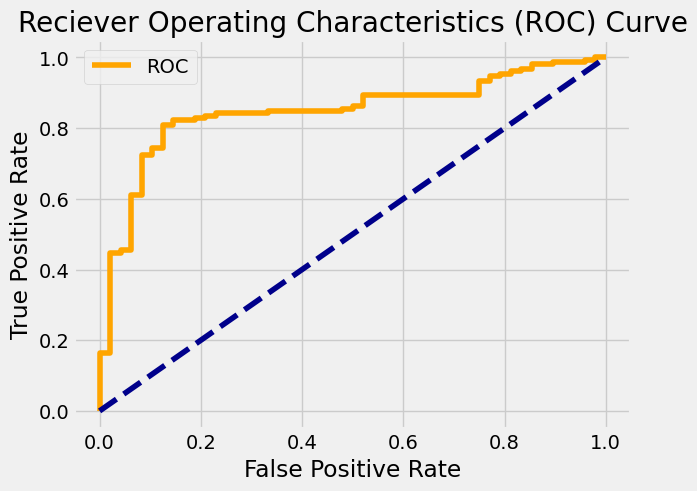

In [ ]:
# Improvement by findind optimal threshold from ROC Curve
pred_prob = model.predict_proba(X_Test)[:, 1]
from sklearn import metrics
def plot_roc_curve(fpr, tpr) :
  plt.plot(fpr, tpr, color = 'orange',label = 'ROC')
  plt.plot([0, 1],[0,1], color ='darkblue', linestyle = '--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("Reciever Operating Characteristics (ROC) Curve")
  plt.legend()
  plt.show()

y_true = Y_Test
y_scores = pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_scores)
print(tpr)
print(fpr)
print(thresholds)
print(metrics.roc_auc_score(y_true, y_scores))
optimal_idx = np.argmax(tpr- fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is :", optimal_threshold)
plot_roc_curve(fpr, tpr)


In [ ]:
pred = 1*(pred_prob> optimal_threshold)
# After finding optimal thresholds from ROC
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.82

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.88      0.70        48
           1       0.95      0.80      0.87       152

    accuracy                           0.82       200
   macro avg       0.77      0.84      0.79       200
weighted avg       0.86      0.82      0.83       200


 confussion matrix:
 [[ 42   6]
 [ 30 122]]


In [ ]:
X_Test

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,auto_make,auto_model,auto_year,months_bw_incident_and_bind,incident_within_customership
454,126,30,2,0,2000,1171.75,0,472163,1,2,...,3,1,48730,4430,4430,3,33,2011,27,1
794,320,48,2,0,2000,1730.49,7000000,443342,0,5,...,0,1,56160,4680,9360,0,5,1995,20,1
209,404,53,1,0,500,767.14,0,466201,0,2,...,1,1,8800,1760,880,9,15,2002,1,1
310,253,41,0,1,2000,1312.75,0,471453,1,1,...,2,0,80740,7340,14680,7,8,2014,20,1
741,100,33,0,0,500,1124.59,6000000,459428,0,5,...,2,1,40800,6800,6800,10,25,2004,116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,194,39,0,2,1000,1489.24,6000000,608335,1,6,...,2,0,8060,1240,1240,0,5,2004,55,1
29,241,45,2,2,2000,1104.50,0,432211,1,1,...,2,1,91650,14100,14100,4,16,2011,11,1
277,264,41,0,1,500,1411.30,0,474801,0,1,...,0,1,60390,10980,5490,10,24,2004,145,1
261,156,31,2,1,2000,1134.08,0,446895,0,1,...,0,1,59000,5900,5900,8,34,2013,216,0


In [ ]:
model.predict(X_Test.iloc[[78]]) # Pass a DataFrame instead of a single row

array([1])

In [ ]:
import pickle

# Assuming 'model' from previous cells is the DecisionTreeClassifier you want to save
filename='dtc_model.pkl'
pickle.dump(model, open(filename,'wb')) # Replace 'b_dtc' with 'model'

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2
